# Exercise 3 (part 3/3)

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

shroom_data = pd.read_csv("../solution3.2/agaricus-lepiota.data", dtype='category', header=None)
df = pd.DataFrame(shroom_data)
df.columns = ['edibility','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gitt-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
              'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type',
              'veil-color','ring-number','ring-type','spore-print-color','population','habitat']

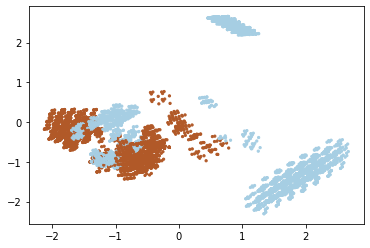

In [74]:
X = df.drop('edibility',1)
y = df.edibility
#y.head(5)
X = pd.get_dummies(X)
y = pd.get_dummies(y)
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)
#Xpca.shape
pcaframe = pd.DataFrame(pca.components_, columns=X.columns)
xy=X.dot(pcaframe.T)
xy = xy.to_numpy()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.scatter(xy[:,0], xy[:,1], s=5, c=y.e, cmap='Paired')

0.7632728053384734
0.4773446471351254


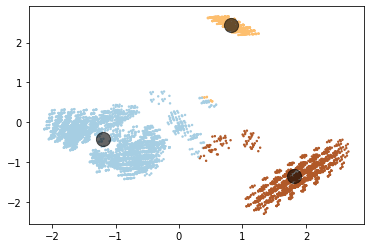

In [80]:
from sklearn.cluster import KMeans
from sklearn import metrics
X = xy
kmeans = KMeans(n_clusters=3)
asd = kmeans.fit(X)
labels = asd.labels_
y_kmeans = kmeans.predict(X)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=2, cmap='Paired', alpha=1)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6);

print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(metrics.adjusted_rand_score(labels, y.e))

* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).

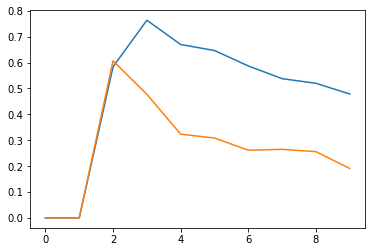

In [82]:
max_k = 10
score = np.zeros((max_k,2))
xs = np.arange(max_k)
for i in range(2,max_k):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit(X).labels_
    score[i,0] = metrics.silhouette_score(X, labels, metric='euclidean')
    score[i,1] = metrics.adjusted_rand_score(labels, y.e)
labels = ['Silhouette', 'ARI']
for i in range(2):
    plt.plot(xs, score[:,i], label=labels[i])

* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

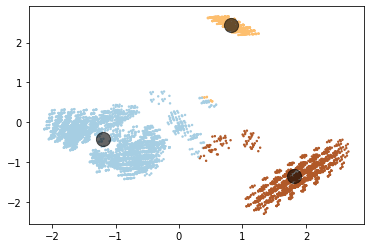

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=2, cmap='Paired', alpha=1)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6);